___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import nltk
#from transformers import TFAutoModel
from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
from tensorflow.keras import Model
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Data Wrangling

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews (1).csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(['Unnamed: 0', 'Clothing ID'], axis = 1, inplace=True)

In [8]:
df.shape

(23486, 9)

In [9]:
df.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [10]:
df.describe(include=object)

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


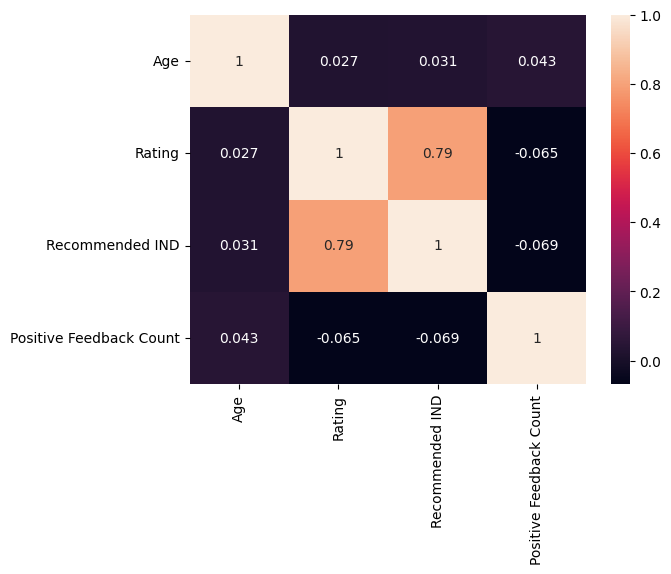

In [11]:
sns.heatmap(df.corr(), annot=True); #there is high relationship between Recommended and Rating feature

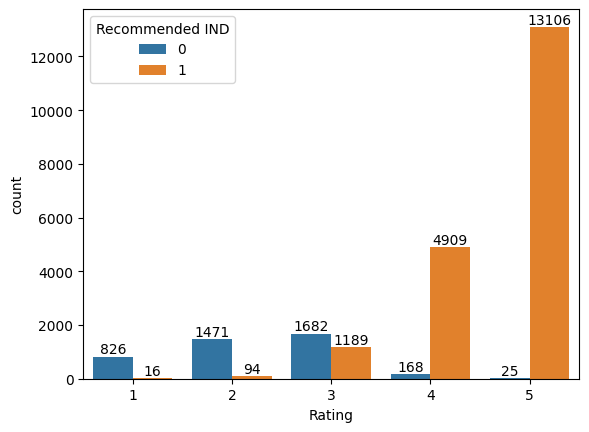

In [12]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p) # plot shows if Rating 4-5 most likely be recommended but if was less not recommended

In [13]:
px.histogram(df, x = df['Rating']) # visualizing the overall review for customers by Rating

In [14]:
px.histogram(df, x = df['Positive Feedback Count']) #visualizing number of positive feedback

<Axes: ylabel='Department Name'>

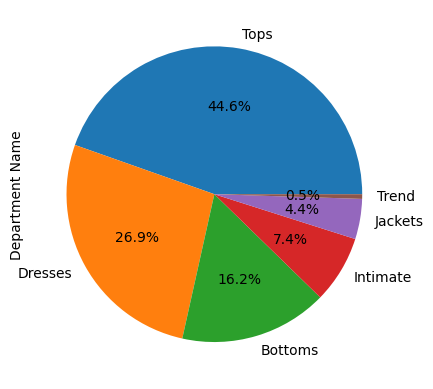

In [15]:
df["Department Name"].value_counts().plot.pie(autopct='%1.1f%%') #visualizing portion for each Department

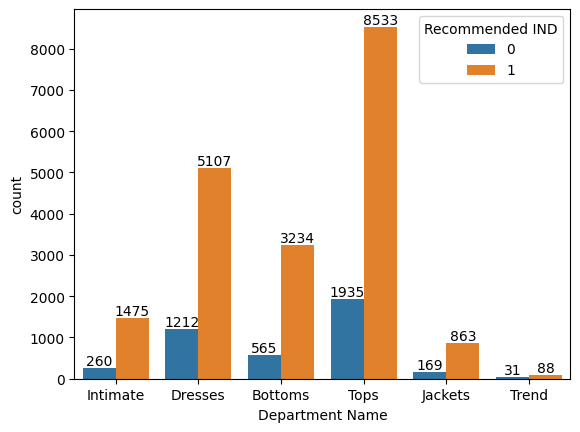

In [16]:
ax = sns.countplot(data = df, x ="Department Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p) #visualizing the number of recommended and not recommended Departments

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

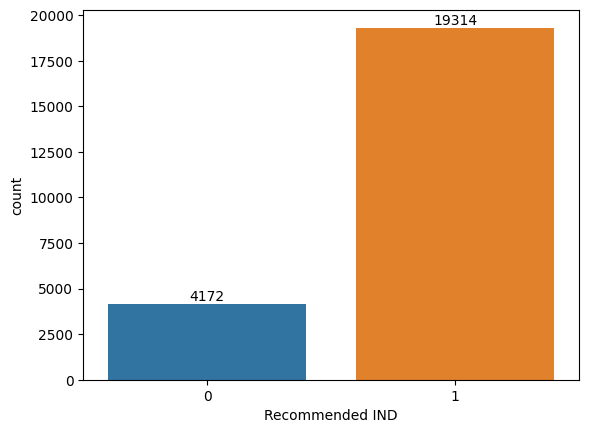

In [17]:
ax = sns.countplot(data =df, x = "Recommended IND")
ax.bar_label(ax.containers[0]);

In [18]:
df2 = df.copy()

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [19]:
df2 =df2[["Recommended IND", "Review Text"]]
df2.head()

,Recommended IND,Review Text
0,1,Absolutely wonderful - silky and sexy and comf...
1,1,Love this dress! it's sooo pretty. i happene...
2,0,I had such high hopes for this dress and reall...
3,1,"I love, love, love this jumpsuit. it's fun, fl..."
4,1,This shirt is very flattering to all due to th...


In [20]:
df2["Review Text"].head(10)

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
5    I love tracy reese dresses, but this one is no...
6    I aded this in my basket at hte last mintue to...
7    I ordered this in carbon for store pick up, an...
8    I love this dress. i usually get an xs but it ...
9    I'm 5"5' and 125 lbs. i ordered the s petite t...
Name: Review Text, dtype: object

---
---


### Missing Value Detection

In [21]:
df2.shape

(23486, 2)

In [22]:
df2.isnull().sum()

Recommended IND      0
Review Text        845
dtype: int64

In [23]:
df2= df2.dropna()

In [24]:
df2.isnull().sum()

Recommended IND    0
Review Text        0
dtype: int64

In [25]:
df2.shape

(22641, 2)

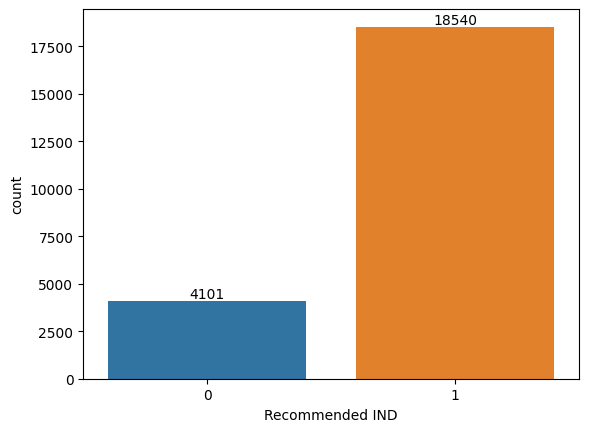

In [26]:
ax = sns.countplot(data =df2, x = "Recommended IND")
ax.bar_label(ax.containers[0]); # we have imbalance data

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [27]:
stop_words = set(stopwords.words('english'))

In [28]:
def cleaning(data):

    #1. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #2. Tokenize
    text_tokens = word_tokenize(data.lower())

    #3. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]


    #6. joining
    return " ".join( text_cleaned)

In [29]:
df2["Review Text"] = df2["Review Text"].apply(cleaning)

In [30]:
df2["Review Text"].head(10)

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
5    love tracy reese dress one petite foot tall us...
6    aded basket hte last mintue see would look lik...
7    ordered carbon store pick ton stuff always try...
8    love dress usually get x run little snug bust ...
9    im lb ordered petite make sure length wasnt lo...
Name: Review Text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [31]:
pos_words = df2[df2["Recommended IND"]== 1]

In [32]:
neg_words = df2[df2["Recommended IND"]== 0]

### Collect Words (positive and negative separately)

In [33]:
pos_words = " ".join(df2[df2["Recommended IND"] == 1]["Review Text"]).split()

In [34]:
neg_words = " ".join(df2[df2["Recommended IND"] == 0]["Review Text"]).split()

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [35]:
from wordcloud import WordCloud

In [36]:
pos_worldcloud = WordCloud(background_color="black", max_words =250)

In [37]:
pos_worldcloud.generate(str(pos_words))

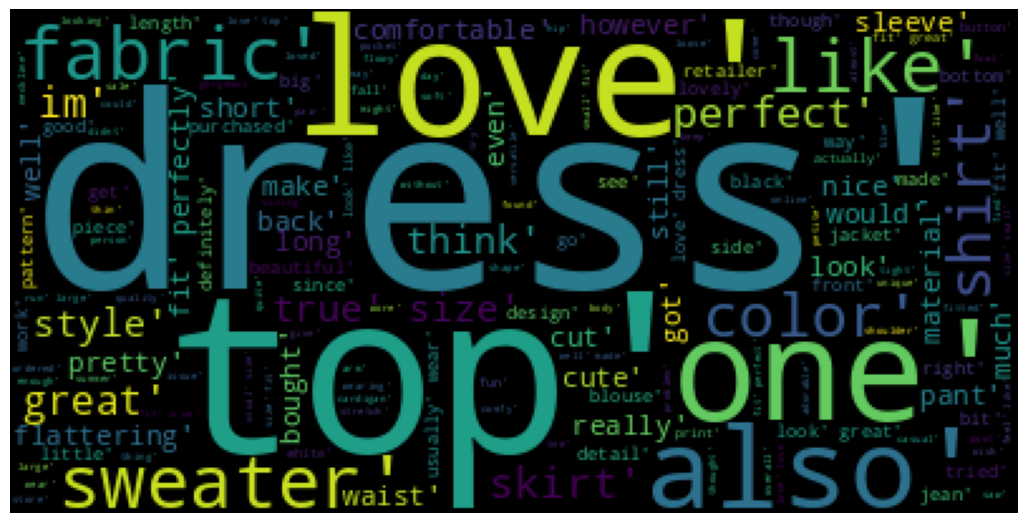

In [38]:
plt.figure(figsize = (13, 13))
plt.imshow(pos_worldcloud)
plt.axis("off")
plt.show()

In [39]:
neg_worldcloud = WordCloud(background_color="black", max_words =250)

In [40]:
neg_worldcloud.generate(str(neg_words))

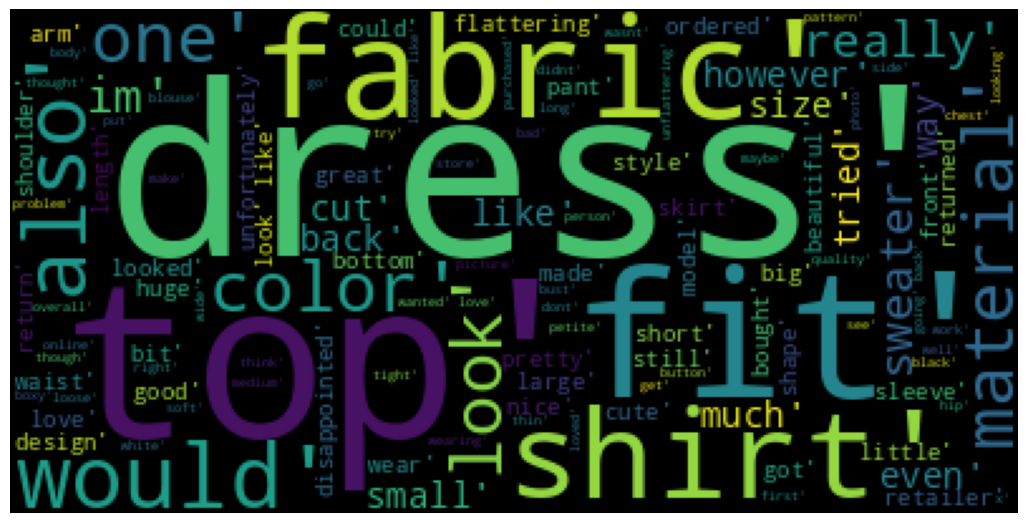

In [41]:
plt.figure(figsize = (13, 13))
plt.imshow(neg_worldcloud)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df2["Review Text"]
y = df2["Recommended IND"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [47]:
vectorizer.get_feature_names_out()

array(['ab', 'abby', 'abdomen', ..., 'zipping', 'zone', 'zoom'],
      dtype=object)

In [48]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [51]:
tf_idf_vectorizer.get_feature_names_out()

array(['aa', 'aaaaandidontwanttopayforshipping', 'aaaaannnnnnd', ...,
       'zone', 'zoom', 'zooming'], dtype=object)

In [52]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(), index= X_train.index)
df_train_tfidf

,aa,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaahed,aame,ab,abbey,abby,abck,...,ziploc,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoom,zooming
1222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [54]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr = LogisticRegression(penalty= "l2", C=10, class_weight='balanced')

### CountVectorizer

In [57]:
lr.fit(X_train_count, y_train)

LogisticRegression(C=10, class_weight='balanced')

In [58]:
print("logistic Regression MODEL")
eval(lr, X_train_count, X_test_count) # here we can notice we have overfit in (recall, f1, and precision) a little bit, i try improve it by grid search

logistic Regression MODEL
[[ 599  221]
 [ 398 3311]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       820
           1       0.94      0.89      0.91      3709

    accuracy                           0.86      4529
   macro avg       0.77      0.81      0.79      4529
weighted avg       0.88      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3281
           1       1.00      0.95      0.97     14831

    accuracy                           0.95     18112
   macro avg       0.90      0.96      0.93     18112
weighted avg       0.96      0.95      0.96     18112



In [59]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=[0]),
            'recall-neg': make_scorer(recall_score, average=None, labels = [0]),
            'f1-neg': make_scorer(f1_score, average=None, labels = [0])}

scores = cross_validate(lr, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.857221
train_accuracy         0.961358
test_precision-neg     0.589218
train_precision-neg    0.832366
test_recall-neg        0.702532
train_recall-neg       0.985099
test_f1-neg            0.640577
train_f1-neg           0.902311
dtype: float64

In [60]:
!pip install scikit-plot

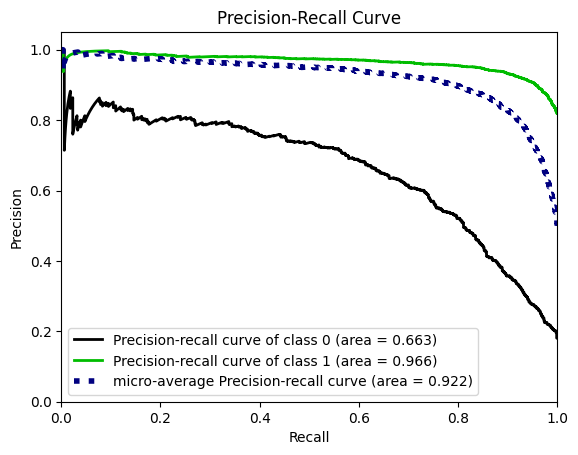

In [61]:
from scikitplot.metrics import plot_roc, plot_precision_recall



lr.fit(X_train_count, y_train)

y_pred_proba = lr.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

# **Grid Search**

In [62]:
param_grid = { 'penalty': ["l1","l2"],
                'C': [0.01, 0.1, 1, 5, 10, 15, 20, 25], 'class_weight': [0.1, 0.5, "balanced"]
             }

In [63]:
recall_0= make_scorer(recall_score, average=None, labels=[0]) #i choose recall to reduce overfit (the highest differnce)

In [64]:
from sklearn.model_selection import GridSearchCV
grid_model_lr = GridSearchCV(lr, param_grid, verbose=3, scoring=recall_0, refit=True,n_jobs=-1, return_train_score=True)

In [65]:
grid_model_lr.fit(X_train_count,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=LogisticRegression(C=10, class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 15, 20, 25],
                         'class_weight': [0.1, 0.5, 'balanced'],
                         'penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[0]),
             verbose=3)

In [66]:
grid_model_lr.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

In [67]:
pd.DataFrame(grid_model_lr.cv_results_).loc[grid_model_lr.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score      0.83604
mean_train_score    0.879915
Name: 5, dtype: object

In [68]:
eval(grid_model_lr, X_train_count, X_test_count) # as we notice the accuracy on the average but now there is no overfit between (recall, f1, and precision)

[[ 691  129]
 [ 568 3141]]
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.84      0.66       820
           1       0.96      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.75      0.84      0.78      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.57      0.88      0.69      3281
           1       0.97      0.86      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



Fitting 5 folds for each of 48 candidates, totalling 240 fits


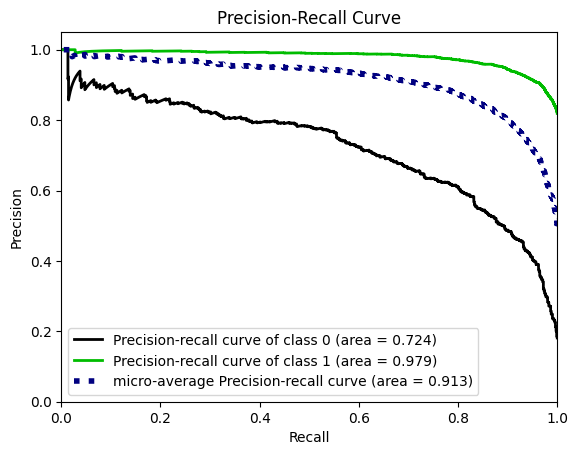

In [69]:
grid_model_lr.fit(X_train_count, y_train)

y_pred_proba = grid_model_lr.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [71]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
y_pred = grid_model_lr.predict(X_test_count)
y_pred_proba= grid_model_lr.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [72]:
lr_tf_idf = LogisticRegression(penalty= "l2", C=0.01, class_weight='balanced') # because grid search reduce the overfit. so, i use best parameters here
lr_tf_idf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.01, class_weight='balanced')

In [73]:
print("Logistic Regression MODEL")
eval(lr_tf_idf, X_train_tf_idf, X_test_tf_idf)

Logistic Regression MODEL
[[ 709  111]
 [ 660 3049]]
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.86      0.65       820
           1       0.96      0.82      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.74      0.84      0.77      4529
weighted avg       0.88      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.52      0.87      0.65      3281
           1       0.97      0.82      0.89     14831

    accuracy                           0.83     18112
   macro avg       0.74      0.85      0.77     18112
weighted avg       0.89      0.83      0.85     18112



In [74]:
scores = cross_validate(lr_tf_idf, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.824481
train_accuracy         0.830861
test_precision-neg     0.509650
train_precision-neg    0.519793
test_recall-neg        0.851572
train_recall-neg       0.870839
test_f1-neg            0.637513
train_f1-neg           0.651006
dtype: float64

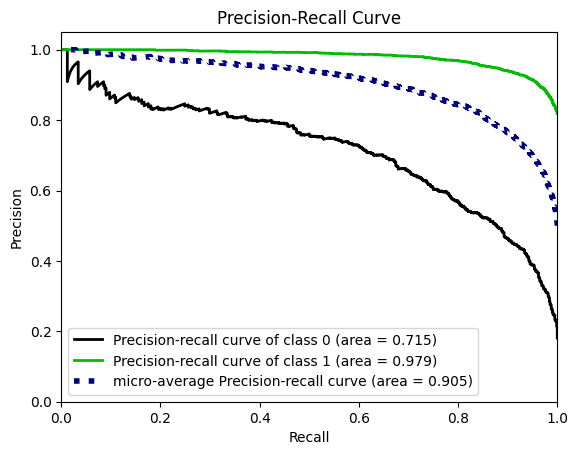

In [75]:
lr_tf_idf.fit(X_train_tf_idf, y_train)

y_pred_proba = lr_tf_idf.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [76]:
y_pred = lr_tf_idf.predict(X_test_tf_idf)
y_pred_proba= lr_tf_idf.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [77]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [78]:
nb = BernoulliNB(alpha=10)
nb.fit(X_train_count,y_train)

BernoulliNB(alpha=10)

In [79]:
print("Naive bayes MODEL")
eval(nb, X_train_count, X_test_count) #we can notice recall very low. so, i try to improve recall by grid search

Naive bayes MODEL
[[ 163  657]
 [  43 3666]]
Test_Set
              precision    recall  f1-score   support

           0       0.79      0.20      0.32       820
           1       0.85      0.99      0.91      3709

    accuracy                           0.85      4529
   macro avg       0.82      0.59      0.62      4529
weighted avg       0.84      0.85      0.81      4529

Train_Set
              precision    recall  f1-score   support

           0       0.76      0.21      0.33      3281
           1       0.85      0.99      0.91     14831

    accuracy                           0.85     18112
   macro avg       0.81      0.60      0.62     18112
weighted avg       0.83      0.85      0.81     18112



In [80]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-0': make_scorer(precision_score, average=None, labels=[0]),
            'recall-0': make_scorer(recall_score, average=None, labels = [0]),
            'f1-0': make_scorer(f1_score, average=None, labels = [0])}

model = BernoulliNB(alpha=10)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.835855
train_accuracy       0.842069
test_precision-0     0.722817
train_precision-0    0.782936
test_recall-0        0.153313
train_recall-0       0.177351
test_f1-0            0.252241
train_f1-0           0.289185
dtype: float64

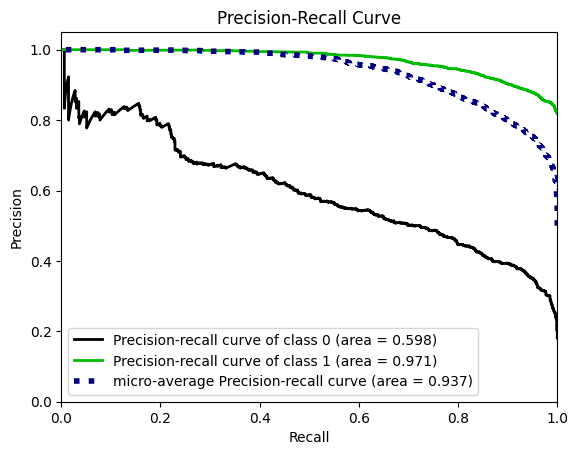

In [81]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = BernoulliNB(alpha=10)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

# **Grid Search**

In [82]:
nb.get_params()

{'alpha': 10,
 'binarize': 0.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn'}

In [83]:
param_grid = { 'alpha': [0.1, 0.5, 5, 10],
             }

In [84]:
recall_0= make_scorer(recall_score, average=None, labels=[0]) #to enhance recall for not recommened label (0)

In [85]:
grid_model_nb = GridSearchCV(nb, param_grid, verbose=3, scoring=recall_0, refit=True,n_jobs=-1, return_train_score=True)

In [86]:
grid_model_nb.fit(X_train_count,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=BernoulliNB(alpha=10), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 5, 10]}, return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[0]),
             verbose=3)

In [87]:
grid_model_nb.best_params_

{'alpha': 0.5}

In [88]:
y_pred = grid_model_nb.predict(X_test_count)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [89]:
pd.DataFrame(grid_model_nb.cv_results_).loc[grid_model_nb.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.747031
mean_train_score    0.824596
Name: 1, dtype: object

In [90]:
eval(grid_model_nb, X_train_count, X_test_count) # the recall is improving and also, the accuracy

[[ 600  220]
 [ 304 3405]]
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.73      0.70       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.82      0.81      4529
weighted avg       0.89      0.88      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.91     18112



Fitting 5 folds for each of 4 candidates, totalling 20 fits


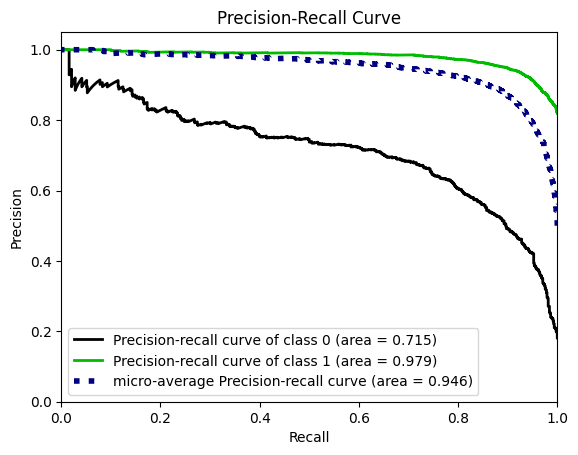

In [91]:
grid_model_nb.fit(X_train_count, y_train)

y_pred_proba = grid_model_nb.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [92]:
y_pred = grid_model_nb.predict(X_test_count)
y_pred_proba= grid_model_nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [93]:
nb_tf_idf = BernoulliNB(alpha=0.5) # because result of grid search better. so, i use best parameters here
nb_tf_idf.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.5)

In [94]:
print("Naive bayes MODEL")
eval(nb_tf_idf, X_train_tf_idf, X_test_tf_idf)

Naive bayes MODEL
[[ 547  273]
 [ 260 3449]]
Test_Set
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       820
           1       0.93      0.93      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.80      0.80      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.73      0.81      0.76      3281
           1       0.96      0.93      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.84      0.87      0.85     18112
weighted avg       0.91      0.91      0.91     18112



In [95]:
scores = cross_validate(nb_tf_idf, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.875828
train_accuracy       0.911336
test_precision-0     0.641338
train_precision-0    0.734191
test_recall-0        0.714724
train_recall-0       0.800298
test_f1-0            0.675790
train_f1-0           0.765818
dtype: float64

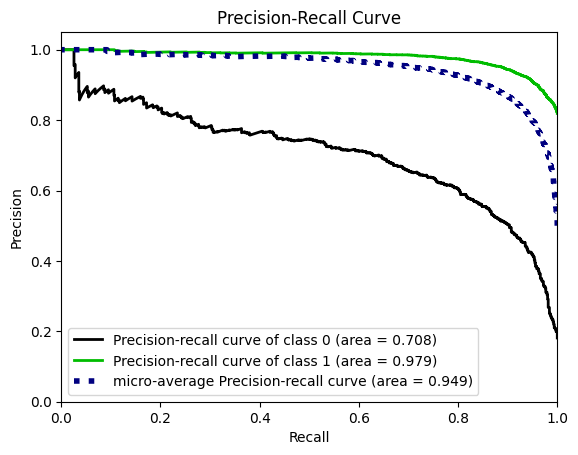

In [96]:
nb_tf_idf.fit(X_train_tf_idf, y_train)

y_pred_proba = nb_tf_idf.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [97]:
y_pred = nb_tf_idf.predict(X_test_tf_idf)
y_pred_proba= nb_tf_idf.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [98]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced")
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced')

In [99]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count) # the results here are good. so, i didn't do the grid search

SVC MODEL
[[ 692  128]
 [ 465 3244]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.84      0.70       820
           1       0.96      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3281
           1       0.98      0.89      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112



In [100]:
scores = cross_validate(svc, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.864509
train_accuracy       0.895662
test_precision-0     0.589868
train_precision-0    0.648812
test_recall-0        0.829929
train_recall-0       0.924380
test_f1-0            0.689439
train_f1-0           0.762460
dtype: float64

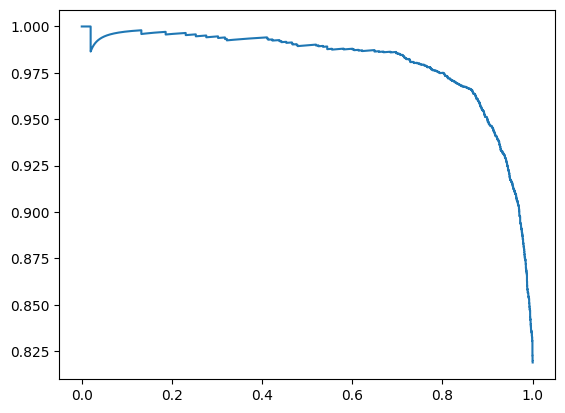

In [101]:
from sklearn.metrics import precision_recall_curve
svc.fit(X_train_count, y_train)

y_pred = svc.decision_function(X_test_count)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.show()

In [102]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [103]:
svc_tf_idf = LinearSVC(C=0.01, class_weight="balanced")
svc_tf_idf.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced')

In [104]:
print("SVC MODEL")
eval(svc_tf_idf, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[ 713  107]
 [ 585 3124]]
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.87      0.67       820
           1       0.97      0.84      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [105]:
scores = cross_validate(svc_tf_idf, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.843142
train_accuracy       0.854854
test_precision-0     0.542735
train_precision-0    0.562738
test_recall-0        0.861323
train_recall-0       0.891395
test_f1-0            0.665637
train_f1-0           0.689925
dtype: float64

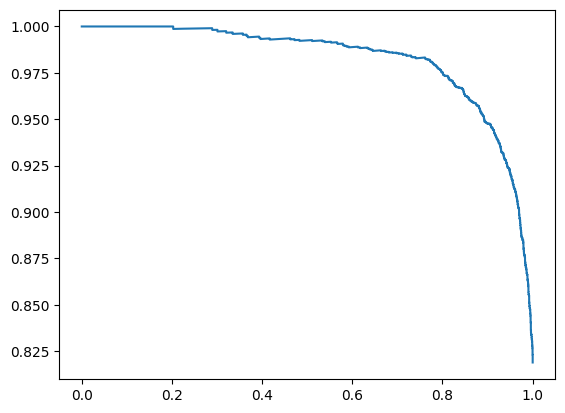

In [106]:
svc_tf_idf.fit(X_train_tf_idf, y_train)

y_pred = svc_tf_idf.decision_function(X_test_tf_idf)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.show()

In [107]:
y_pred = svc_tf_idf.predict(X_test_tf_idf)
decision_function= svc_tf_idf.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [109]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count) # there is overfit.

RF MODEL
[[ 445  375]
 [ 203 3506]]
Test_Set
              precision    recall  f1-score   support

           0       0.69      0.54      0.61       820
           1       0.90      0.95      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.80      0.74      0.77      4529
weighted avg       0.86      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3281
           1       1.00      0.98      0.99     14831

    accuracy                           0.98     18112
   macro avg       0.95      0.98      0.97     18112
weighted avg       0.98      0.98      0.98     18112



In [110]:
scores = cross_validate(rf, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.872460
train_accuracy       0.982265
test_precision-0     0.697575
train_precision-0    0.925056
test_recall-0        0.525153
train_recall-0       0.981645
test_f1-0            0.598680
train_f1-0           0.952506
dtype: float64

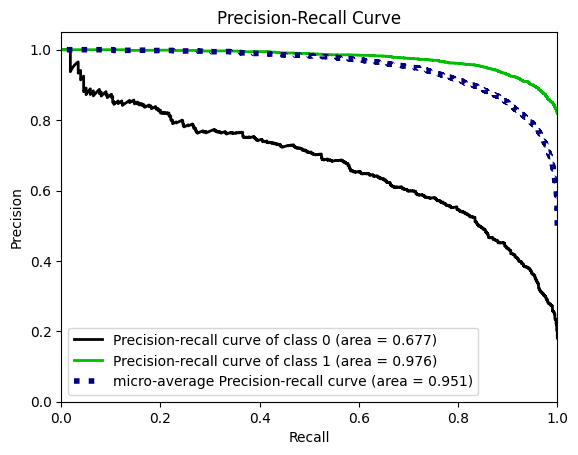

In [111]:
rf.fit(X_train_count, y_train)

y_pred_proba = rf.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [112]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [113]:
param_grid = {'n_estimators':[100,200,300],
             'criterion': ["gini","entropy"],
             'max_depth':[10,20,30,40]}

In [114]:
recall_0= make_scorer(recall_score, average=None, labels=[0]) #to reduce overfit

In [115]:
grid_model_rf = GridSearchCV(rf, param_grid, verbose=3, scoring=recall_0, refit=True,n_jobs=-1, return_train_score=True)

In [116]:
grid_model_rf.fit(X_train_count,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=40, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[0]),
             verbose=3)

In [117]:
grid_model_rf.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}

In [118]:
pd.DataFrame(grid_model_rf.cv_results_).loc[grid_model_rf.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.806774
mean_train_score    0.886163
Name: 14, dtype: object

In [119]:
eval(grid_model_rf, X_train_count, X_test_count) # so, the overfit reduced

[[ 665  155]
 [ 565 3144]]
Test_Set
              precision    recall  f1-score   support

           0       0.54      0.81      0.65       820
           1       0.95      0.85      0.90      3709

    accuracy                           0.84      4529
   macro avg       0.75      0.83      0.77      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.89      0.71      3281
           1       0.97      0.86      0.91     14831

    accuracy                           0.87     18112
   macro avg       0.78      0.88      0.81     18112
weighted avg       0.90      0.87      0.88     18112



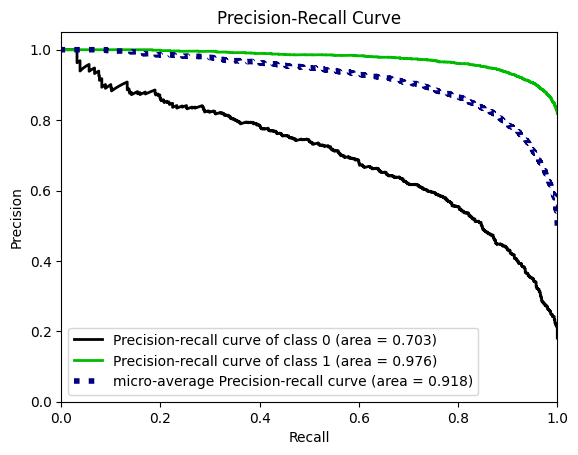

In [120]:

y_pred_proba = grid_model_rf.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [121]:
y_pred = grid_model_rf.predict(X_test_count)
y_pred_proba= grid_model_rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [122]:
rf_tf_idf = RandomForestClassifier(300, max_depth =10, random_state = 42, n_jobs = -1, class_weight="balanced", criterion = 'entropy')
rf_tf_idf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [123]:
print("RF MODEL")
eval(rf_tf_idf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[ 656  164]
 [ 578 3131]]
Test_Set
              precision    recall  f1-score   support

           0       0.53      0.80      0.64       820
           1       0.95      0.84      0.89      3709

    accuracy                           0.84      4529
   macro avg       0.74      0.82      0.77      4529
weighted avg       0.87      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.58      0.91      0.71      3281
           1       0.98      0.86      0.91     14831

    accuracy                           0.87     18112
   macro avg       0.78      0.88      0.81     18112
weighted avg       0.91      0.87      0.88     18112



In [124]:
scores = cross_validate(rf_tf_idf, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.838559
train_accuracy       0.876975
test_precision-0     0.537327
train_precision-0    0.607800
test_recall-0        0.800671
train_recall-0       0.905279
test_f1-0            0.642737
train_f1-0           0.727259
dtype: float64

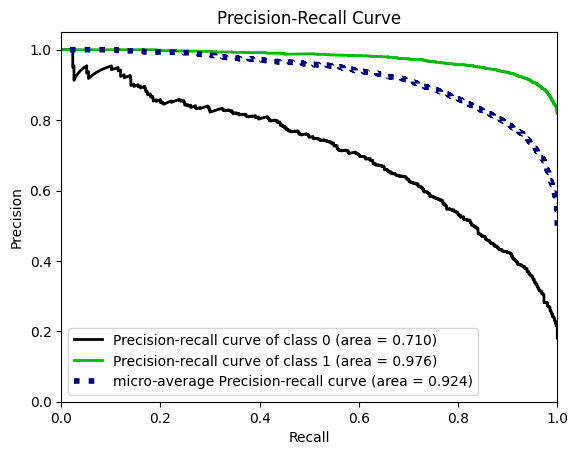

In [125]:
y_pred_proba = rf_tf_idf.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [126]:
y_pred = rf_tf_idf.predict(X_test_tf_idf)
y_pred_proba= rf_tf_idf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [127]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [128]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count) # the results here are good. so, i didn't do the grid search

Ada MODEL
[[ 472  348]
 [ 184 3525]]
Test_Set
              precision    recall  f1-score   support

           0       0.72      0.58      0.64       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.76      0.78      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      3281
           1       0.93      0.96      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.83     18112
weighted avg       0.90      0.91      0.90     18112



In [129]:
scores = cross_validate(ada, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.878533
train_accuracy       0.910311
test_precision-0     0.701006
train_precision-0    0.806499
test_recall-0        0.575735
train_recall-0       0.664262
test_f1-0            0.631655
train_f1-0           0.728488
dtype: float64

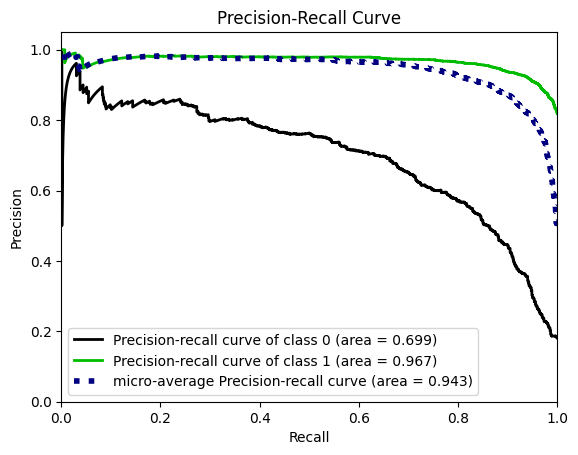

In [130]:
y_pred_proba = ada.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [131]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [132]:
ada_tf_idf = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada_tf_idf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [133]:
print("Ada MODEL")
eval(ada_tf_idf, X_train_tf_idf, X_test_tf_idf) # also here the results are good. so, i didn't do the grid search

Ada MODEL
[[ 476  344]
 [ 213 3496]]
Test_Set
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       820
           1       0.91      0.94      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.76      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      3281
           1       0.94      0.97      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



In [134]:
scores = cross_validate(ada_tf_idf, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy        0.873288
train_accuracy       0.923427
test_precision-0     0.681940
train_precision-0    0.835281
test_recall-0        0.566585
train_recall-0       0.719123
test_f1-0            0.618397
train_f1-0           0.772852
dtype: float64

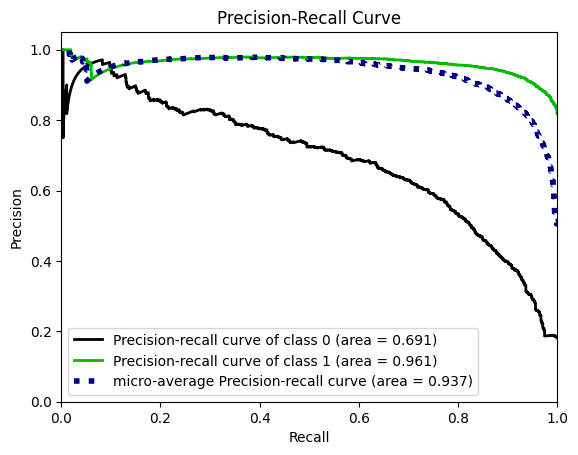

In [135]:
y_pred_proba = ada_tf_idf.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [136]:
y_pred = ada_tf_idf.predict(X_test_tf_idf)
y_pred_proba= ada_tf_idf.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [138]:
X = df2["Review Text"]
y = df2["Recommended IND"]

In [139]:
num_words = 10001

tokenizer = Tokenizer(num_words=num_words)

In [140]:
tokenizer.fit_on_texts(X)

### Creating word index

In [141]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'size': 3,
 'love': 4,
 'top': 5,
 'like': 6,
 'color': 7,
 'look': 8,
 'wear': 9,
 'great': 10,
 'im': 11,
 'would': 12,
 'fabric': 13,
 'small': 14,
 'really': 15,
 'ordered': 16,
 'little': 17,
 'perfect': 18,
 'one': 19,
 'flattering': 20,
 'soft': 21,
 'well': 22,
 'back': 23,
 'comfortable': 24,
 'cute': 25,
 'nice': 26,
 'bought': 27,
 'beautiful': 28,
 'bit': 29,
 'material': 30,
 'shirt': 31,
 'large': 32,
 'much': 33,
 'sweater': 34,
 'length': 35,
 'run': 36,
 'jean': 37,
 'also': 38,
 'work': 39,
 'petite': 40,
 'got': 41,
 'long': 42,
 'short': 43,
 'waist': 44,
 'quality': 45,
 'medium': 46,
 'skirt': 47,
 'think': 48,
 'pretty': 49,
 'even': 50,
 'retailer': 51,
 'x': 52,
 'make': 53,
 'feel': 54,
 'tried': 55,
 'pant': 56,
 'store': 57,
 'usually': 58,
 'get': 59,
 'way': 60,
 'sleeve': 61,
 'good': 62,
 'could': 63,
 'big': 64,
 'made': 65,
 'cut': 66,
 'go': 67,
 'dont': 68,
 'didnt': 69,
 'still': 70,
 'style': 71,
 'right': 72,
 'black': 73,

In [142]:
len(tokenizer.word_index)

11996

### Converting tokens to numeric

In [143]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [144]:
X[:3]

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
Name: Review Text, dtype: object

In [145]:
X_num_tokens[:3]

[[173, 406, 733, 513, 24],
 [4,
  1,
  1391,
  49,
  1063,
  150,
  57,
  11,
  220,
  992,
  318,
  12,
  16,
  77,
  992,
  40,
  27,
  40,
  4,
  35,
  162,
  17,
  207,
  12,
  92,
  75,
  1131,
  325,
  599,
  40],
 [136,
  389,
  1,
  15,
  129,
  39,
  918,
  16,
  40,
  14,
  160,
  3,
  151,
  5500,
  14,
  14,
  501,
  63,
  576,
  1747,
  40,
  46,
  171,
  5,
  518,
  24,
  2,
  176,
  91,
  518,
  86,
  295,
  397,
  552,
  367,
  3792,
  295,
  1521,
  1522,
  78,
  712,
  3792,
  295,
  665,
  2708,
  335,
  787]]

### Maximum number of tokens for all documents¶

In [146]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [147]:
num_tokens # there is different number of tokens for each documents, we must stable number of tokens

array([ 5, 30, 47, ..., 19, 38, 10])

In [148]:
num_tokens.mean() # the average of tokens number

28.23501612119606

In [149]:
num_tokens.max() # the longest document has 58 tokens

58

In [150]:
list2 = [5, 15, 20, 25, 30, 35, 47]
print(np.array(list2) <= 28) # i try for the average
print(sum(np.array(list2) <= 28))
print(sum(np.array(list2) <= 28)/len(list2))

[ True  True  True  True False False False]
4
0.5714285714285714


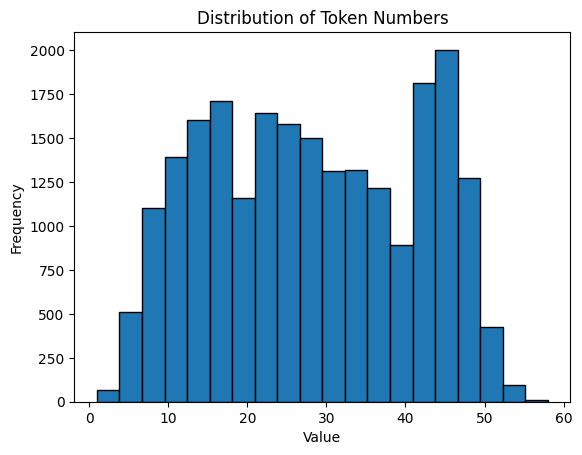

In [151]:
plt.hist(num_tokens, bins=20, edgecolor='black')
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show() # above of 55 better, there is no difference with max 58. so, i choose it

In [152]:
max_tokens = 58
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [153]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

In [154]:
X_pad.shape

(22641, 58)

In [155]:
X_num_tokens[100] # there is 12 tokent in doucument 100

[13, 184, 367, 69, 150, 20, 5, 236, 79, 46, 131, 1108]

In [156]:
X_pad[100] # after padding, we fix it to 58 token

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,   13,  184,  367,   69,  150,   20,    5,  236,   79,
         46,  131, 1108], dtype=int32)

### Train Set Split

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

### Modeling

In [159]:
model = Sequential()
embedding_size = 50

In [160]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=12, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [161]:
optimizer = Adam(learning_rate=0.002)

In [162]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [163]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 50)            500050    
                                                                 
 dropout (Dropout)           (None, 58, 50)            0         
                                                                 
 gru (GRU)                   (None, 58, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 58, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 58, 25)            5775      
                                                                 
 dropout_2 (Dropout)         (None, 58, 25)            0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [164]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,
                           patience = 2, restore_best_weights=True)

In [165]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61060833, 2.76022758])

In [166]:
model.fit(X_train, y_train, epochs=20, batch_size=32, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/20
637/637 [==============================] - 52s 61ms/step - loss: 0.4275 - recall: 0.7966 - val_loss: 0.3160 - val_recall: 0.8658
Epoch 2/20
637/637 [==============================] - 16s 24ms/step - loss: 0.2797 - recall: 0.8705 - val_loss: 0.2902 - val_recall: 0.9111
Epoch 3/20
637/637 [==============================] - 10s 16ms/step - loss: 0.2179 - recall: 0.9012 - val_loss: 0.3220 - val_recall: 0.8771
Epoch 4/20
637/637 [==============================] - 10s 15ms/step - loss: 0.1727 - recall: 0.9230 - val_loss: 0.4001 - val_recall: 0.8453
Epoch 4: early stopping


### Model Evaluation

In [167]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.427499,0.796644,0.316042,0.865768
1,0.279695,0.870482,0.290234,0.911051
2,0.217902,0.901169,0.321987,0.877089
3,0.172682,0.923045,0.400126,0.845283


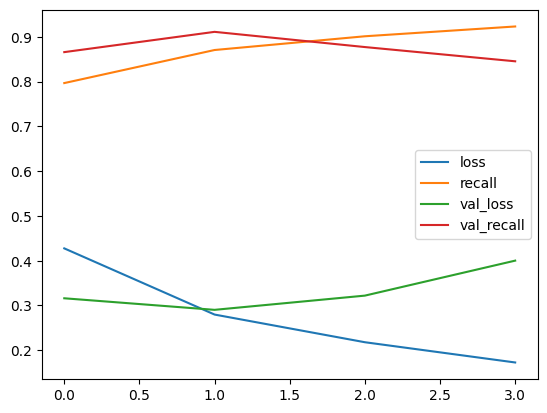

In [168]:
model_loss.plot();

In [169]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 1s 6ms/step
[[ 307  103]
 [ 165 1690]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       410
           1       0.94      0.91      0.93      1855

    accuracy                           0.88      2265
   macro avg       0.80      0.83      0.81      2265
weighted avg       0.89      0.88      0.88      2265



In [170]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 3s 4ms/step
[[ 3450   241]
 [ 1074 15611]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      3691
           1       0.98      0.94      0.96     16685

    accuracy                           0.94     20376
   macro avg       0.87      0.94      0.90     20376
weighted avg       0.94      0.94      0.94     20376



In [171]:
!pip install scikit-plot

71/71 [==============================] - 0s 6ms/step


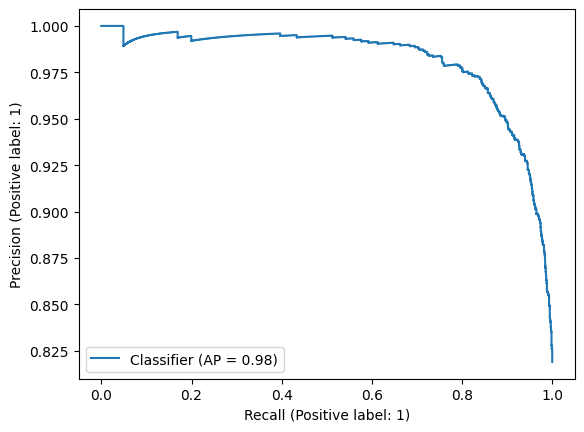

In [172]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [173]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.9815292691601354

In [174]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [175]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 17.4 MB/s eta 0:00:00


In [176]:
import tensorflow as tf
import os

In [ ]:
#resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

#tf.config.experimental_connect_to_cluster(resolver)
#tf.tpu.experimental.initialize_tpu_system(resolver)
#print("All devices: ", tf.config.list_logical_devices('TPU'))

In [ ]:
#strategy = tf.distribute.TPUStrategy(resolver)

### Tokenization

In [177]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')



In [178]:
print(len(tokenizer.vocab)) # there is 28996 tokens in Bert model

28996


In [179]:
tokenizer2 = AutoTokenizer.from_pretrained('bert-base-uncased')

In [180]:
print(len(tokenizer2.vocab))

30522


### Train test split

In [181]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

### Fixing token counts of all documents

In [182]:
num_of_sent_tokens = []
for sent in X:


    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  81


In [183]:
np.array(num_of_sent_tokens).mean()

34.479969965990904

In [184]:
num_tokens2 = np.array(num_of_sent_tokens)

In [185]:
list3 = [15, 20, 25, 30, 35, 40]
print(np.array(list3) <= 34) # i try for the average
print(sum(np.array(list3) <= 34))
print(sum(np.array(list3) <= 34)/len(list3))

[ True  True  True  True False False]
4
0.6666666666666666


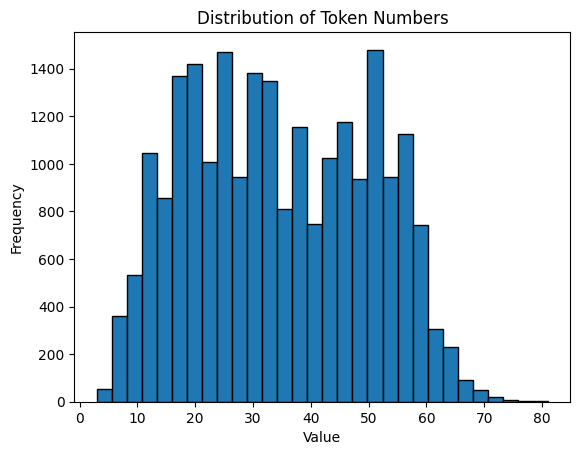

In [186]:
plt.hist(num_tokens2, bins=30, edgecolor='black')
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [187]:
token_size = 81 # i fix it all document to 81 size
sum(np.array(num_of_sent_tokens) < token_size) / len(num_of_sent_tokens)

0.999955832339561

### Transformation Vectors to Matrices

In [188]:
def transformation(X):
  # set array dimensions
  seq_len = 81

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [189]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [190]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)


Xids_train.shape  : (20376, 81)
Xmask_train.shape : (20376, 81)
Xids_test.shape   : (2265, 81)
Xmask_test.shape  : (2265, 81)


In [191]:
labels_train = y_train2.values.reshape(-1,1)
labels_train

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [192]:
labels_test = y_test2.values.reshape(-1,1)
labels_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

### Transformation Matrix to Tensorflow tensor

In [193]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(81,), dtype=tf.int64, name=None), TensorSpec(shape=(81,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [194]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(81,), dtype=tf.int64, name=None), TensorSpec(shape=(81,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [195]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [196]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [197]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(81,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(81,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [198]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(81,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(81,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [199]:
batch_size = 32

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [200]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 75.7 MB/s eta 0:00:00


### Creating optimization

In [201]:
from official.nlp import optimization
epochs = 2
steps_per_epoch = len(dataset_train)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [202]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1274
127


### Creating Model with TPU

In [210]:
from transformers import TFAutoModel
def create_model():

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(81,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(81,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.2, name="dropout")(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [211]:
#with strategy.scope():

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Recall

optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
loss = BinaryCrossentropy()
recall = Recall()
model3 = create_model()
model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [212]:
pd.Series(y).value_counts(normalize=True)

1    0.818868
0    0.181132
Name: Recommended IND, dtype: float64

In [213]:
weights = {0:0.18, 1:0.81}

### Model Fiting

In [214]:
model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights)

Epoch 1/2
637/637 [==============================] - 398s 558ms/step - loss: 0.4531 - recall_2: 0.6568 - val_loss: 0.6334 - val_recall_2: 0.8798
Epoch 2/2
637/637 [==============================] - 351s 550ms/step - loss: 0.3384 - recall_2: 0.8912 - val_loss: 0.4692 - val_recall_2: 0.9984


### Model evaluation

In [215]:
y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test2, y_pred))

71/71 [==============================] - 21s 185ms/step
              precision    recall  f1-score   support

           0       0.93      0.09      0.16       410
           1       0.83      1.00      0.91      1855

    accuracy                           0.83      2265
   macro avg       0.88      0.54      0.54      2265
weighted avg       0.85      0.83      0.77      2265



In [216]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test2, y_pred_proba)

71/71 [==============================] - 14s 203ms/step


0.9636236502142055

In [217]:
BERT_with_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test2, y_pred)
BERT_with_weighted_rec = recall_score(y_test2, y_pred)

# **Without Weighted**

In [220]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=2e-5)
loss = BinaryCrossentropy()
recall = Recall()
model3 = create_model()
model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [221]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/2
637/637 [==============================] - 398s 560ms/step - loss: 0.6553 - recall_4: 0.6333 - val_loss: 0.4079 - val_recall_4: 0.9973
Epoch 2/2
637/637 [==============================] - 350s 549ms/step - loss: 0.5028 - recall_4: 0.8563 - val_loss: 0.4128 - val_recall_4: 0.9984


In [222]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall_4,val_loss,val_recall_4
0,0.655342,0.633263,0.407852,0.997305
1,0.502787,0.856278,0.412756,0.998383


<Axes: >

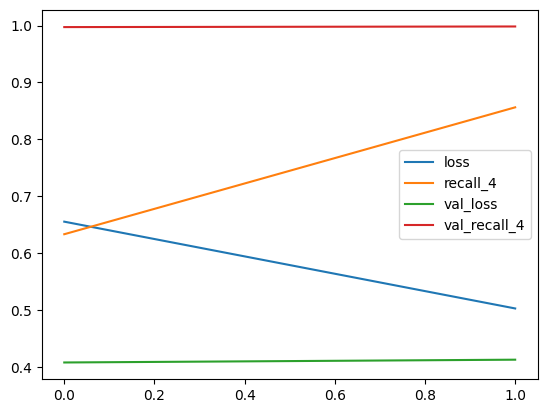

In [223]:
model_loss.plot()

In [224]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

71/71 [==============================] - 18s 187ms/step
              precision    recall  f1-score   support

           0       0.95      0.13      0.23       410
           1       0.84      1.00      0.91      1855

    accuracy                           0.84      2265
   macro avg       0.89      0.56      0.57      2265
weighted avg       0.86      0.84      0.79      2265



In [225]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred))

637/637 [==============================] - 119s 186ms/step
              precision    recall  f1-score   support

           0       0.96      0.17      0.29      3691
           1       0.84      1.00      0.92     16685

    accuracy                           0.85     20376
   macro avg       0.90      0.59      0.60     20376
weighted avg       0.87      0.85      0.80     20376



In [228]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

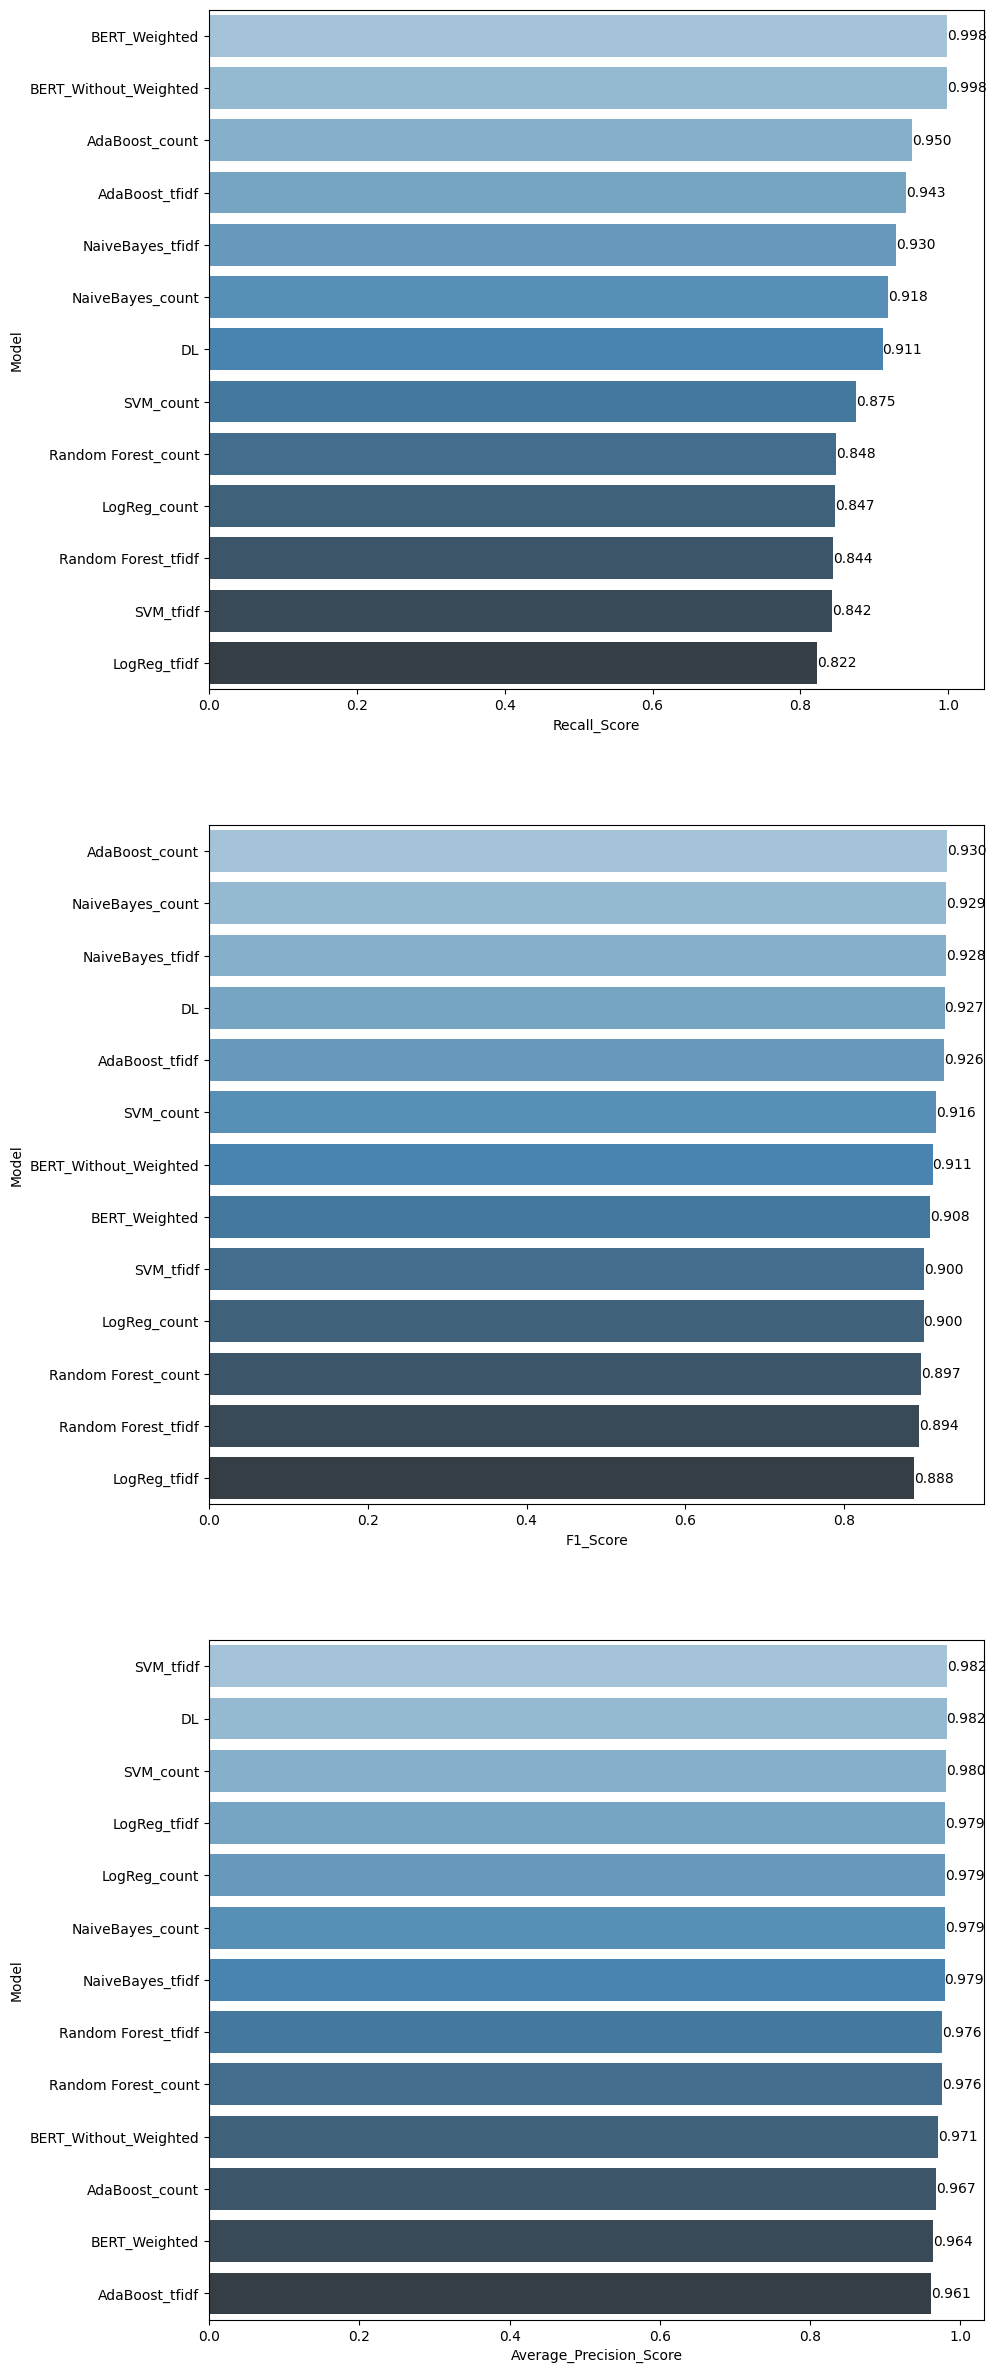

In [229]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1,
                                     BERT_without_weighted_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec,
                                         BERT_without_weighted_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP,
                                                    BERT_without_weighted_AP]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___